## Task about lakes

- Generate 20 random variable from 1 to 100
- Draw the plot of the  sequence 
- Lets assume each point represent the height and so all plotting is 2d mountains. 
- Then consider the unlimited rain from above - cavities become lakes full of water. 
- Determine the deepest lake

#### Expected result

You may present the result by visualization or numbers that provide information about the boundaries of the lake and its deepest point

In [325]:
# Install libraries from requirements.txt
%pip install -r "C:\Users\DELL\Documents\GitHub\Data_Science\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [326]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema
%matplotlib inline

In [327]:
# Generate a numpy array of 20 random integer variables in interval [1, 100] (use 2023 as a seed)
np.random.seed(2023)
heights = np.random.randint(1, 101, size=25)
heights

array([88, 26, 71, 56, 34, 93,  4, 53, 87, 97, 23, 18, 54, 48, 78, 40, 70,
       89,  4, 59, 29, 82, 72, 64, 49])

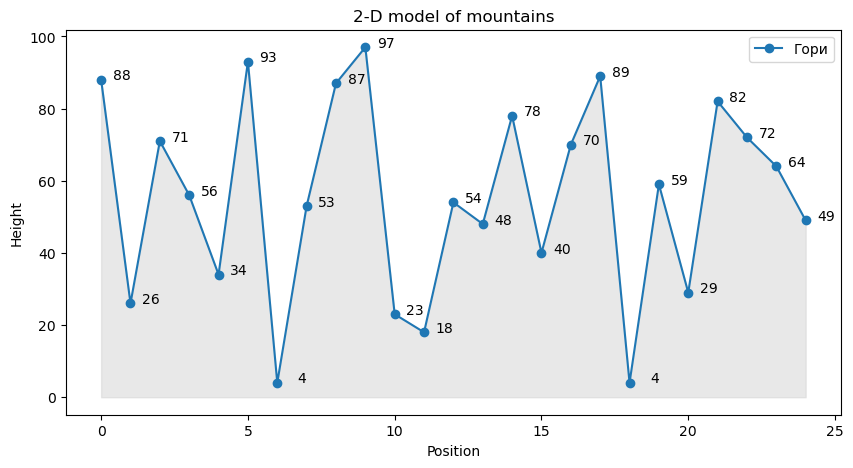

In [328]:
# Show the plot of generated array
x = np.arange(len(heights))
plt.figure(figsize=(10, 5))
plt.plot(x, heights, marker='o', linestyle='-', label='Гори')
plt.fill_between(x, heights, color='lightgray', alpha=0.5)  # Заповнюємо гори сірим

# Додаємо підписи до точок
for i, h in enumerate(heights):
    plt.text(i+1, h, str(h), fontsize=10, ha='right')
plt.xlabel('Position')
plt.ylabel('Height')
plt.title('2-D model of mountains')
plt.legend()
plt.show()

In [329]:
# Функція для пошуку найглибшого озера
def find_deepest_lake(heights):
    heights = np.array(heights)
    bottom = heights.argmin()  # Дно озера - мінімальне значення
    
    # Пошук піків
    peaks, = argrelextrema(heights, np.greater_equal)
    
    # Ліва і права границі озера
    left_peaks = peaks[peaks < bottom]
    right_peaks = peaks[peaks > bottom]
    
    if len(left_peaks) == 0 or len(right_peaks) == 0:
        return None, None  # Якщо немає границь, то озера нема
    
    left = left_peaks[-1]  # Найближчий пік зліва
    right = right_peaks[0]  # Найближчий пік справа
    
    depth = min(heights[left], heights[right]) - heights[bottom]
    return depth, (left, bottom, right)

In [330]:
# Find the deepest lake
deepest_depth, lake_indexes = find_deepest_lake(heights)
print("Глибина найглибшого озера:", deepest_depth)
print("Індекси:", lake_indexes)

Глибина найглибшого озера: 89
Індекси: (5, 6, 9)


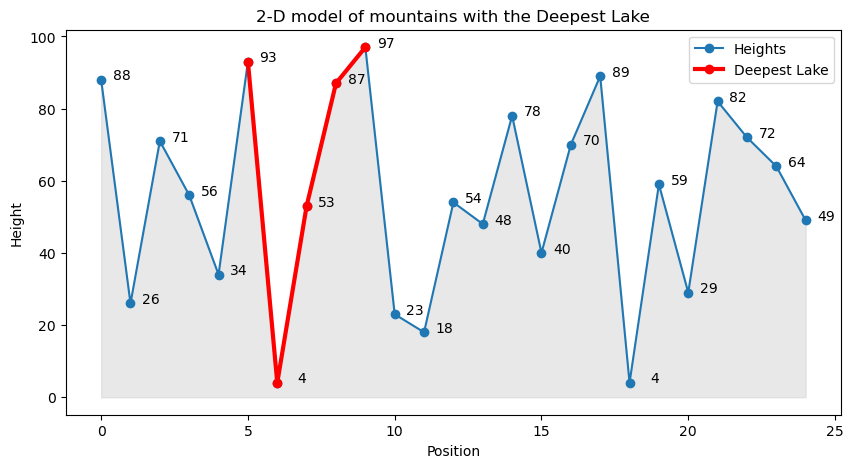

In [331]:
# # Visualize the deepest lake
if lake_indexes:
    i1, i2, i3 = lake_indexes
    valley_x = list(range(i1, i3 + 1))  # Створюємо x-значення для лінії озера
    valley_heights = heights[i1:i3 + 1]  # Отримуємо висоти для цієї частини
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, heights, marker='o', linestyle='-', label='Heights')
    plt.fill_between(x, heights, color='lightgray', alpha=0.5)  # Заповнюємо гори сірим

    # Підсвічуємо найглибше озеро і з'єднуємо точки
    plt.plot(valley_x, valley_heights, marker='o', linestyle='-', color='red', linewidth=3, label="Deepest Lake")
    
    # Додаємо підписи до точок
    for i, h in enumerate(heights):
        plt.text(i + 1, h, str(h), fontsize=10, ha='right')

    plt.xlabel('Position')
    plt.ylabel('Height')
    plt.title('2-D model of mountains with the Deepest Lake')
    plt.legend()
    plt.show()